# Import

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '/path/to/data/SQANTI_reports'

In [3]:
TISSUES = ['aorta', 'colon', 'brain', 'heart', 'lung', 'muscle']
TOOLS = ['flair', 'isoquant', 'isotools_v0', 'isotools_v1', 'isotools_v2', 'stringtie']
tissue = 'aorta'
tool = 'isoquant'

In [4]:
df = pd.read_csv(os.path.join(path, f'{tissue}_{tool}_classification.txt'), sep='\t')
df.head()

isoform chrom strand  length  exons structural_category  \
0  ENST00000003583.12  chr1      -    2544      8   full-splice_match   
1  ENST00000037502.11  chr1      -    2100      3   full-splice_match   
2   ENST00000040877.2  chr1      -    5206     30   full-splice_match   
3  ENST00000054666.11  chr1      +    2178      5   full-splice_match   
4   ENST00000060969.6  chr1      -    5494      5   full-splice_match   

      associated_gene associated_transcript  ref_length  ref_exons  ...  \
0  ENSG00000001460.18    ENST00000003583.12      2544.0        8.0  ...   
1  ENSG00000034971.17    ENST00000037502.11      2100.0        3.0  ...   
2  ENSG00000059588.10     ENST00000040877.2      5206.0       30.0  ...   
3  ENSG00000049245.13    ENST00000054666.11      2178.0        5.0  ...   
4  ENSG00000052723.12     ENST00000060969.6      5494.0        5.0  ...   

   seq_A_downstream_TTS  dist_to_CAGE_peak  within_CAGE_peak  \
0  TATTGAGCTTTTGGGTACCC               -1.0              True   
1  CGTTCTCTTCCTTGAACTTT             2311.0             False   
2  TTTATTTCCTAGAAACGCCT               -1.0              True   
3  TTGTGGCACCTGTGCTCCTT                0.0              True   
4  TCCTTGCTAATATTTTACTT               14.0             False   

   dist_to_polyA_site within_polyA_site  polyA_motif polyA_dist  \
0               -23.0              True       ATTAAA      -16.0   
1               -14.0              True       AATAAA      -15.0   
2               -10.0              True       AATAAA      -24.0   
3                32.0              True       AATAAA      -17.0   
4               -24.0              True       AATAAA      -21.0   

   polyA_motif_found  ORF_seq    ratio_TSS  
0               True      NaN   201.000000  
1               True      NaN  2751.000000  
2               True      NaN          NaN  
3               True      NaN  2527.237624  
4               True      NaN   801.000000  

[5 rows x 48 columns]

In [5]:
df.columns

Index(['isoform', 'chrom', 'strand', 'length', 'exons', 'structural_category',
       'associated_gene', 'associated_transcript', 'ref_length', 'ref_exons',
       'diff_to_TSS', 'diff_to_TTS', 'diff_to_gene_TSS', 'diff_to_gene_TTS',
       'subcategory', 'RTS_stage', 'all_canonical', 'min_sample_cov',
       'min_cov', 'min_cov_pos', 'sd_cov', 'FL', 'n_indels', 'n_indels_junc',
       'bite', 'iso_exp', 'gene_exp', 'ratio_exp', 'FSM_class', 'coding',
       'ORF_length', 'CDS_length', 'CDS_start', 'CDS_end', 'CDS_genomic_start',
       'CDS_genomic_end', 'predicted_NMD', 'perc_A_downstream_TTS',
       'seq_A_downstream_TTS', 'dist_to_CAGE_peak', 'within_CAGE_peak',
       'dist_to_polyA_site', 'within_polyA_site', 'polyA_motif', 'polyA_dist',
       'polyA_motif_found', 'ORF_seq', 'ratio_TSS'],
      dtype='object')

In [6]:
classifications = {} if not 'classifications' in globals() else classifications

def get_classification(tissue, tool) -> pd.DataFrame:
    if not tissue in classifications:
        classifications[tissue] = {}
    if not tool in classifications[tissue]:
        classifications[tissue][tool] = pd.read_csv(os.path.join(path, f'{tissue}_{tool}_classification.txt'), sep='\t')
    return classifications[tissue][tool]

In [7]:
all = pd.DataFrame()
for tissue in TISSUES:
    for tool in TOOLS:
        df = get_classification(tissue, tool).copy()
        df.insert(0, 'tissue', tissue)
        df.insert(1, 'tool', tool)
        # Rename and make boolean
        df['category'] = df['structural_category']
        df['TSS ratio'] = df['ratio_TSS'] > 1.5
        df['CAGE support'] = df['within_CAGE_peak']
        df['polyA site'] = df['within_polyA_site']
        df['polyA motif'] = df['polyA_motif_found']
        df['start both'] = df['TSS ratio'] & df['CAGE support']
        df['end both'] = df['polyA site'] & df['polyA motif']
        all = pd.concat([all, df], ignore_index=True)

In [8]:
all

tissue       tool             isoform chrom strand  length  exons  \
0         aorta      flair  ENST00000037502.11  chr1      -    2100      3   
1         aorta      flair   ENST00000040877.2  chr1      -    5180     30   
2         aorta      flair  ENST00000054666.11  chr1      +    2178      5   
3         aorta      flair   ENST00000060969.6  chr1      -    1414      5   
4         aorta      flair   ENST00000072644.7  chr1      -    1822     11   
...         ...        ...                 ...   ...    ...     ...    ...   
3786115  muscle  stringtie       MSTRG.25759.2  chrY      +    3708      8   
3786116  muscle  stringtie       MSTRG.25759.3  chrY      +    1205      9   
3786117  muscle  stringtie       MSTRG.25759.4  chrY      +    1322     12   
3786118  muscle  stringtie       MSTRG.25759.5  chrY      +    1976     10   
3786119  muscle  stringtie       MSTRG.25760.1  chrY      -    1108      1   

          structural_category     associated_gene associated_transcript  ...  \
0           full-splice_match  ENSG00000034971.17    ENST00000037502.11  ...   
1           full-splice_match  ENSG00000059588.10     ENST00000040877.2  ...   
2           full-splice_match  ENSG00000049245.13    ENST00000054666.11  ...   
3           full-splice_match  ENSG00000052723.12     ENST00000060969.6  ...   
4           full-splice_match  ENSG00000058799.15     ENST00000072644.7  ...   
...                       ...                 ...                   ...  ...   
3786115      novel_in_catalog   ENSG00000292348.1                 novel  ...   
3786116      novel_in_catalog   ENSG00000292348.1                 novel  ...   
3786117      novel_in_catalog   ENSG00000292348.1                 novel  ...   
3786118  novel_not_in_catalog   ENSG00000292348.1                 novel  ...   
3786119          genic_intron       novelGene_606                 novel  ...   

         polyA_motif_found  ORF_seq    ratio_TSS              category  \
0                     True      NaN  2751.000000     full-splice_match   
1                     True      NaN          NaN     full-splice_match   
2                     True      NaN  2527.237624     full-splice_match   
3                     True      NaN     7.842750     full-splice_match   
4                     True      NaN   255.455446     full-splice_match   
...                    ...      ...          ...                   ...   
3786115               True      NaN  1051.000000      novel_in_catalog   
3786116               True      NaN  1051.000000      novel_in_catalog   
3786117               True      NaN  1201.000000      novel_in_catalog   
3786118               True      NaN  1201.000000  novel_not_in_catalog   
3786119               True      NaN     0.980124          genic_intron   

         TSS ratio  CAGE support polyA site  polyA motif start both  end both  
0             True         False       True         True      False      True  
1            False          True       True         True      False      True  
2             True          True       True         True       True      True  
3             True         False       True         True      False      True  
4             True         False       True         True      False      True  
...            ...           ...        ...          ...        ...       ...  
3786115       True         False      False         True      False     False  
3786116       True         False      False         True      False     False  
3786117       True         False      False         True      False     False  
3786118       True         False      False         True      False     False  
3786119      False         False      False         True      False     False  

[3786120 rows x 57 columns]

# Transcript Counts

Barplot for the number of isoforms for each tool and tissue

In [9]:
agg_all = all.groupby(['tool', 'tissue']).agg({'TSS ratio': 'sum', 'CAGE support': 'sum', 'polyA site': 'sum', 'polyA motif': 'sum', 'start both': 'sum', 'end both': 'sum', 'isoform': 'count'}).reset_index()
agg_all['count'] = agg_all['isoform']

agg_by_category = all.groupby(['tool', 'tissue', 'category']).agg({'TSS ratio': 'sum', 'CAGE support': 'sum', 'polyA site': 'sum', 'polyA motif': 'sum', 'start both': 'sum', 'end both': 'sum', 'isoform': 'count'}).reset_index()
agg_by_category['count'] = agg_by_category['isoform']

agg_by_subcategory = all.groupby(['tool', 'tissue', 'category', 'subcategory']).agg({'TSS ratio': 'sum', 'CAGE support': 'sum', 'polyA site': 'sum', 'polyA motif': 'sum', 'start both': 'sum', 'end both': 'sum', 'isoform': 'count'}).reset_index()
agg_by_subcategory['count'] = agg_by_subcategory['isoform']

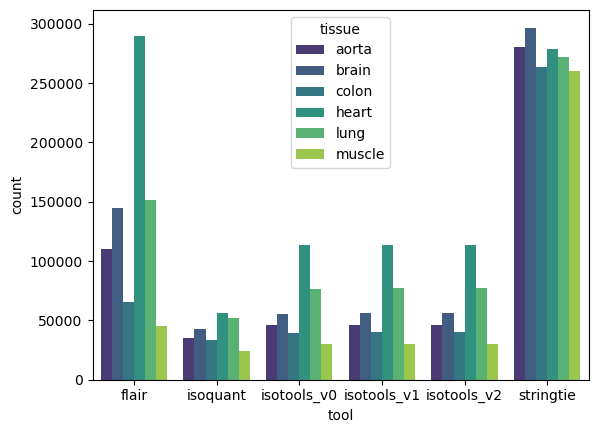

In [10]:
ax = sns.barplot(x='tool', y='count', hue='tissue', data=agg_all, palette='viridis')

# All

In [11]:
def heatmap(df: pd.DataFrame, column, header_suffix='', **params):
    df = df.copy()
    df.loc[:,'relative_metric'] = df[column] / df['count']
    df.loc[:,'annotation'] = df['relative_metric'].map('{:,.1%}'.format) + \
                            '\n(' + df[column].astype(str) + '/' + df['count'].astype(str) + ')'
    # Reshape the data using pivot
    heatmap_data = df.pivot(index='tool', columns='tissue', values='relative_metric')

    # Annotate each cell with the numeric value and the count
    annot = df.pivot(index='tool', columns='tissue', values='annotation')

    # Plot the heatmap
    plt.figure(figsize=(12, 7))
    sns.heatmap(heatmap_data, vmin=0, vmax=1, annot=annot, fmt='', linewidths=0.5, **params)
    plt.title(f'Heatmap of {column}{header_suffix}')
    plt.xlabel('Tissue')
    plt.ylabel('Tool')
    plt.show()

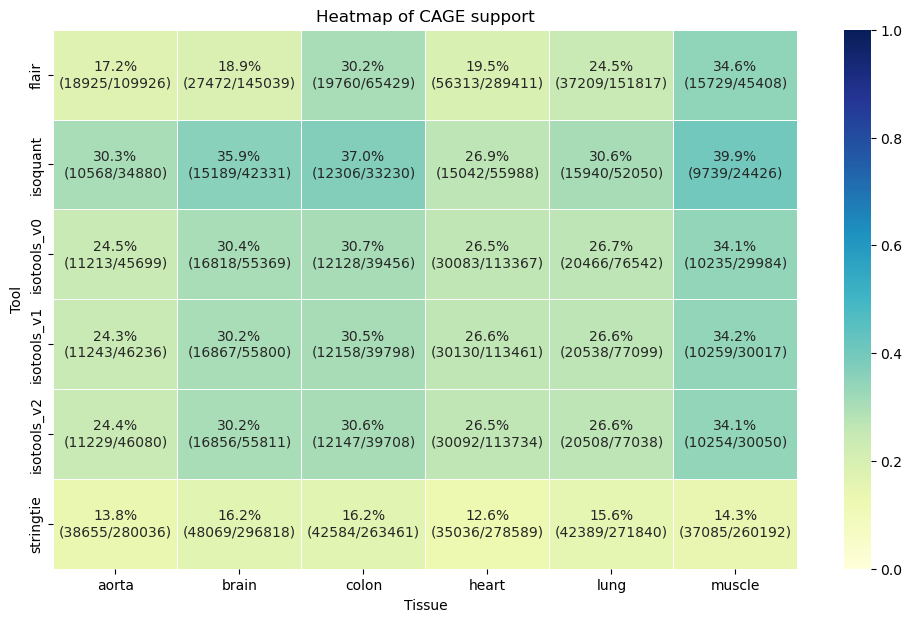

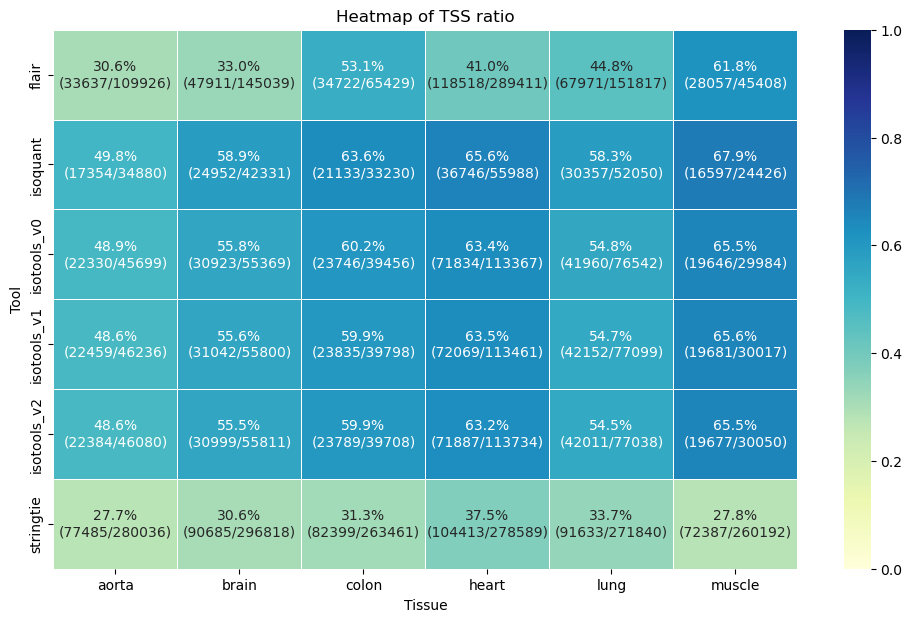

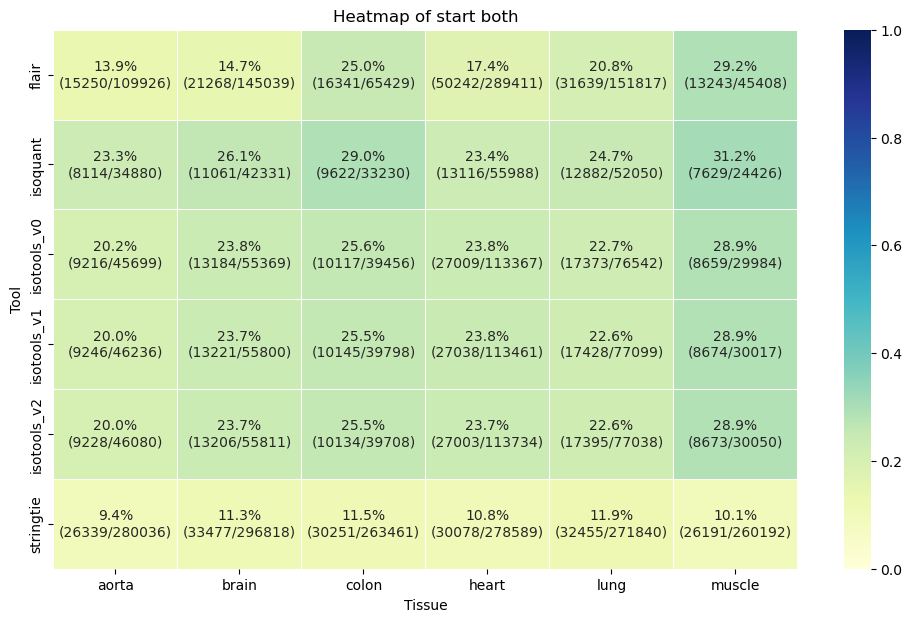

In [12]:
heatmap(agg_all, 'CAGE support', cmap='YlGnBu')
heatmap(agg_all, 'TSS ratio', cmap='YlGnBu')
heatmap(agg_all, 'start both', cmap='YlGnBu')

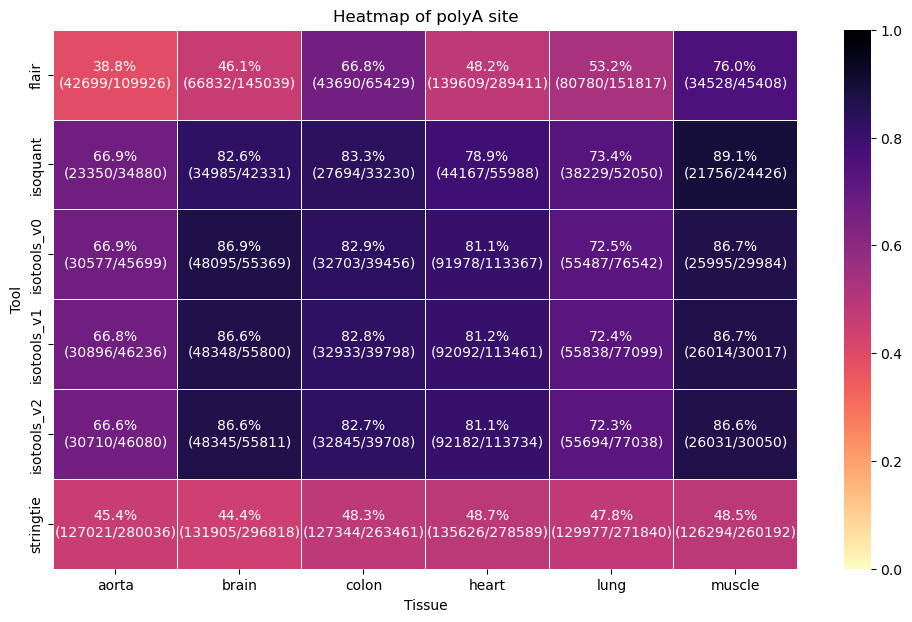

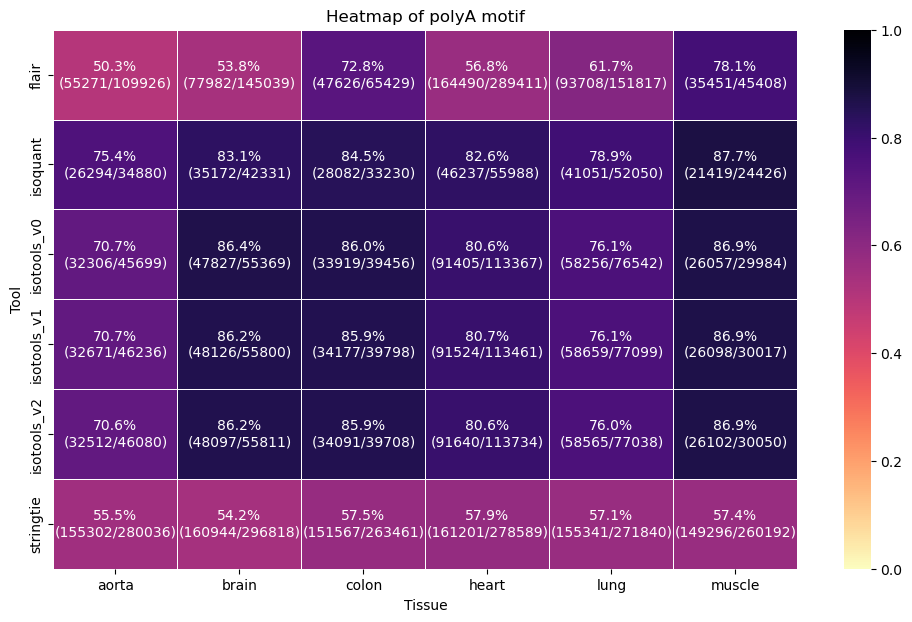

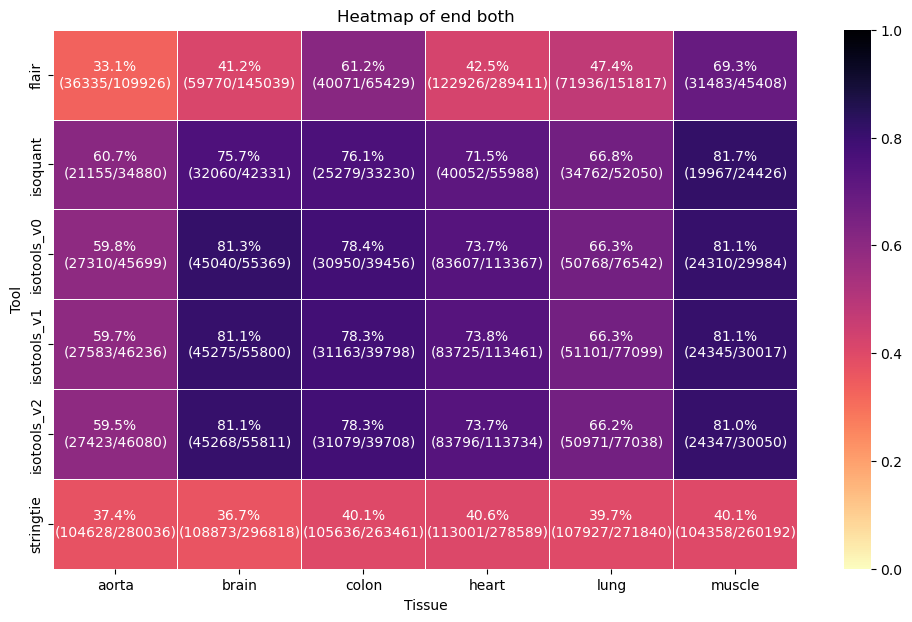

In [13]:
heatmap(agg_all, 'polyA site', cmap='magma_r')
heatmap(agg_all, 'polyA motif', cmap='magma_r')
heatmap(agg_all, 'end both', cmap='magma_r')

# By Category

In [14]:
non_fsm_df = agg_by_category.loc[agg_by_category['category'] != 'full-splice_match'].groupby(['tissue', 'tool']).sum().reset_index()

## Starts

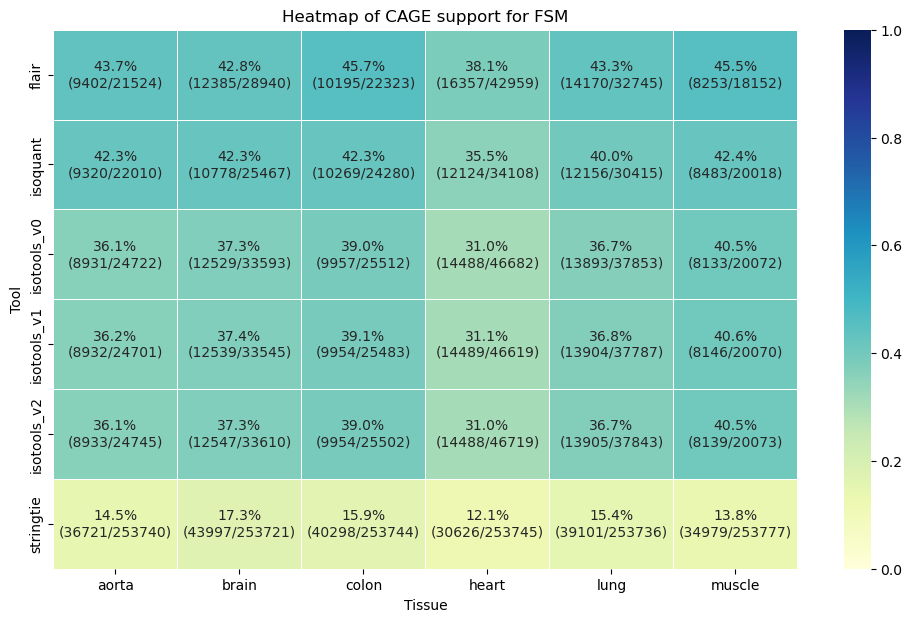

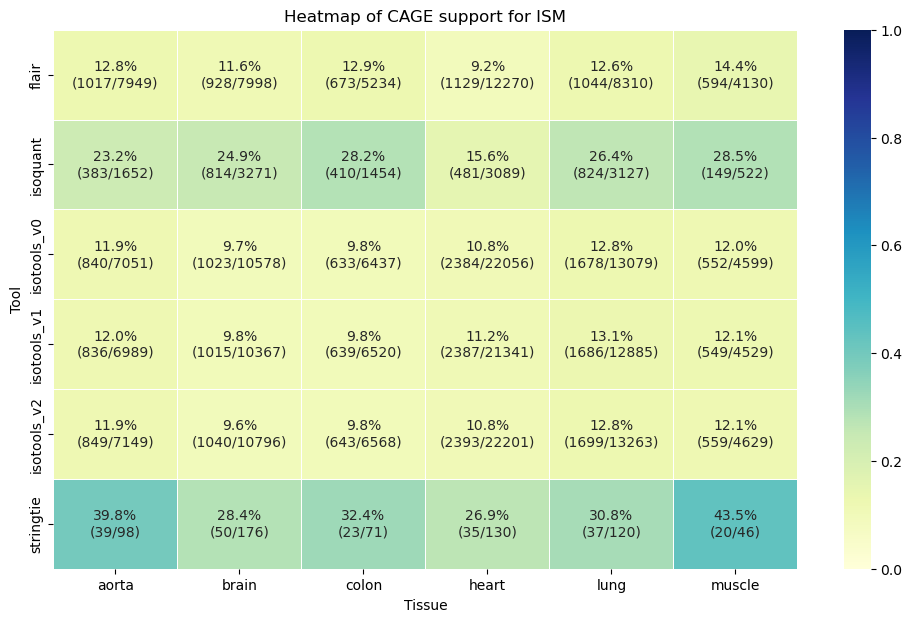

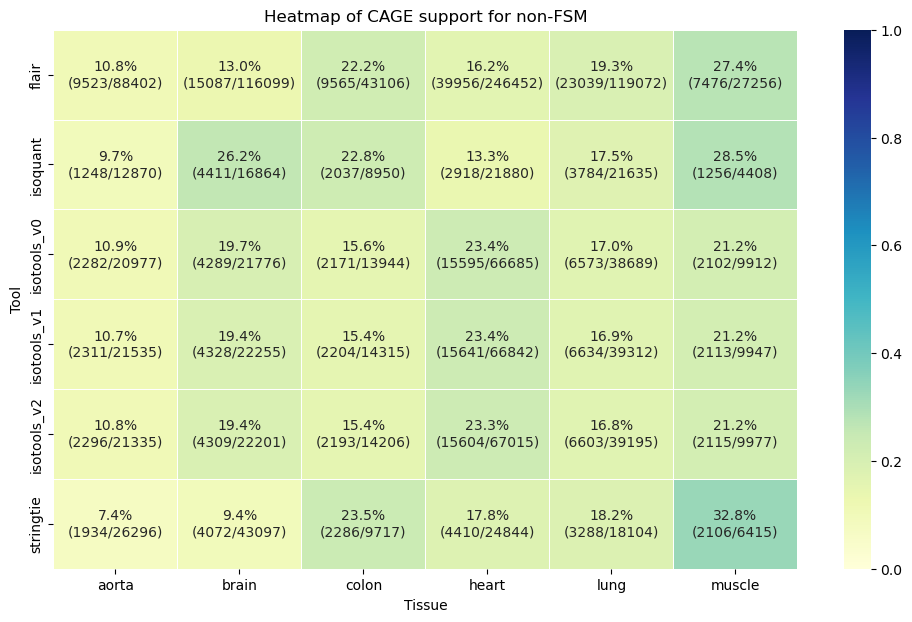

In [15]:
heatmap(agg_by_category.loc[agg_by_category['category'] == 'full-splice_match'], 'CAGE support', ' for FSM', cmap='YlGnBu')
heatmap(agg_by_category.loc[agg_by_category['category'] == 'incomplete-splice_match'], 'CAGE support', ' for ISM', cmap='YlGnBu')
heatmap(non_fsm_df, 'CAGE support', ' for non-FSM', cmap='YlGnBu')

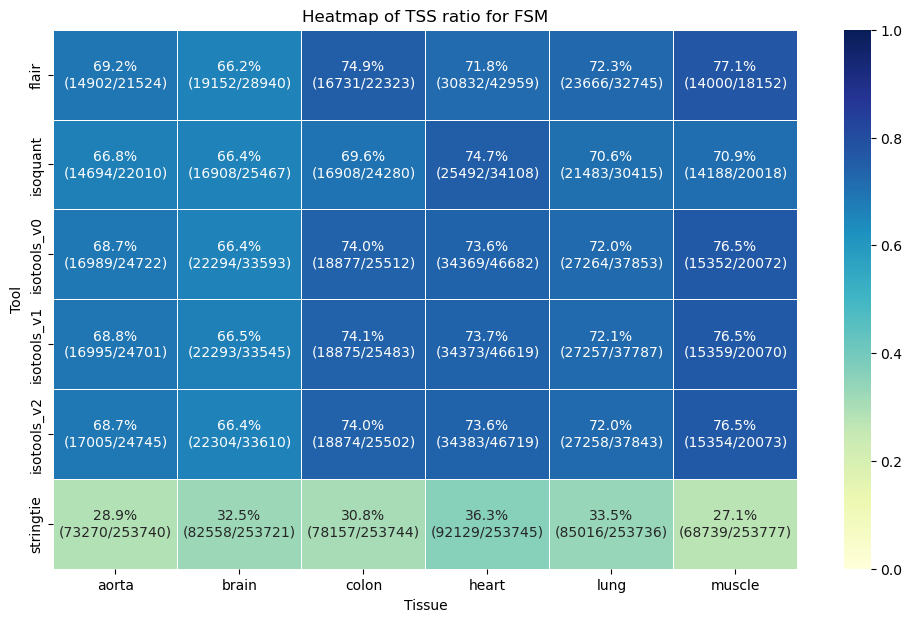

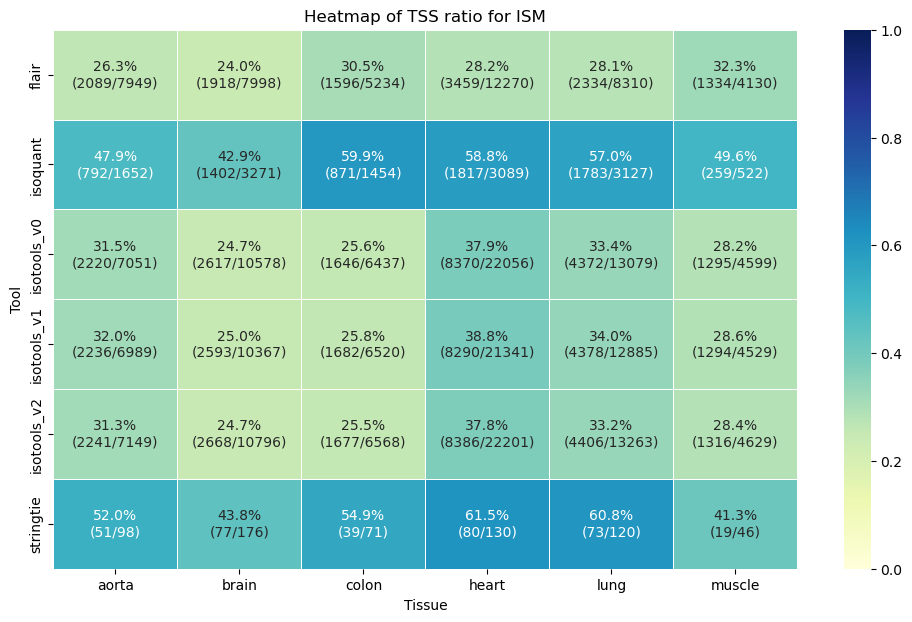

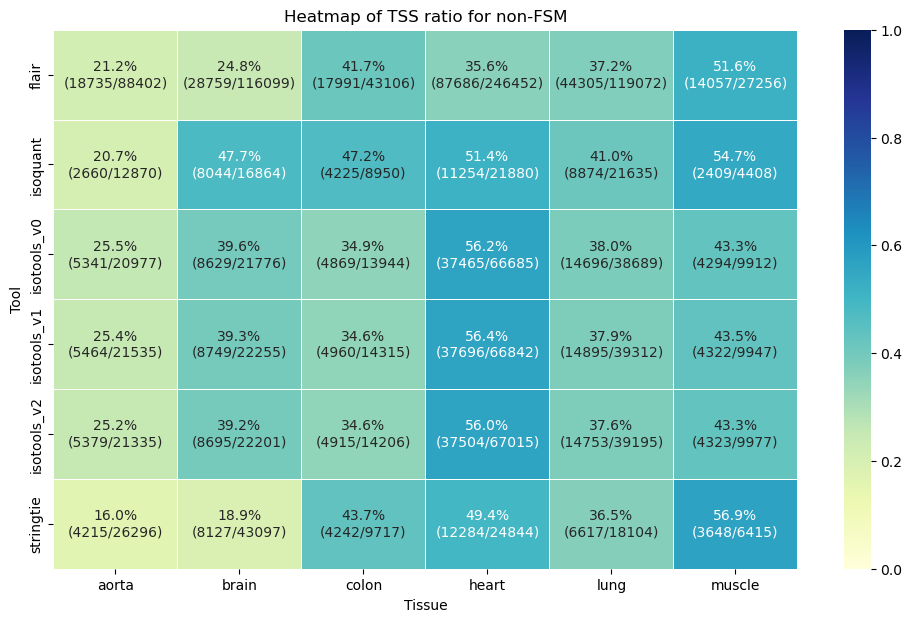

In [16]:
heatmap(agg_by_category.loc[agg_by_category['category'] == 'full-splice_match'], 'TSS ratio', ' for FSM', cmap='YlGnBu')
heatmap(agg_by_category.loc[agg_by_category['category'] == 'incomplete-splice_match'], 'TSS ratio', ' for ISM', cmap='YlGnBu')
heatmap(non_fsm_df, 'TSS ratio', ' for non-FSM', cmap='YlGnBu')

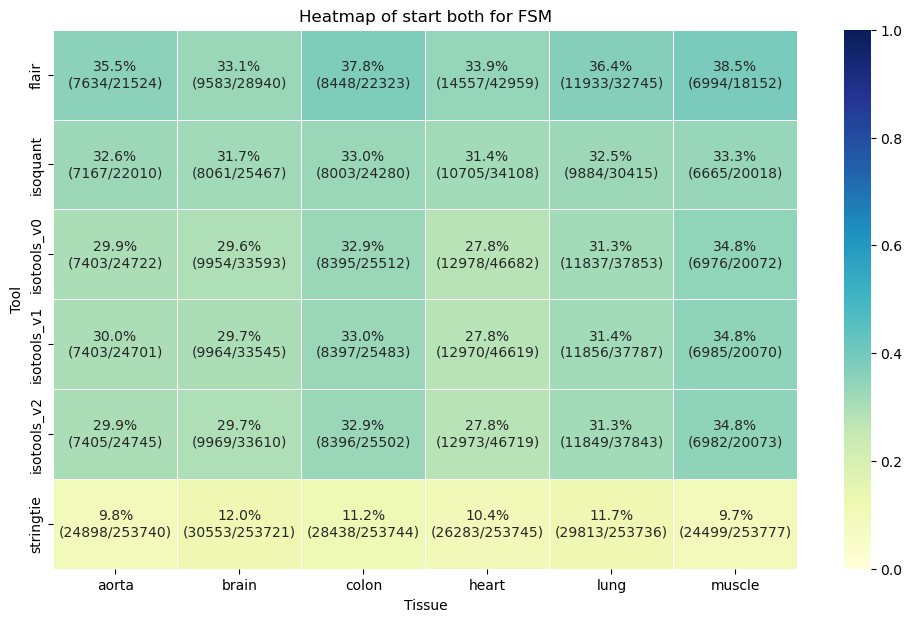

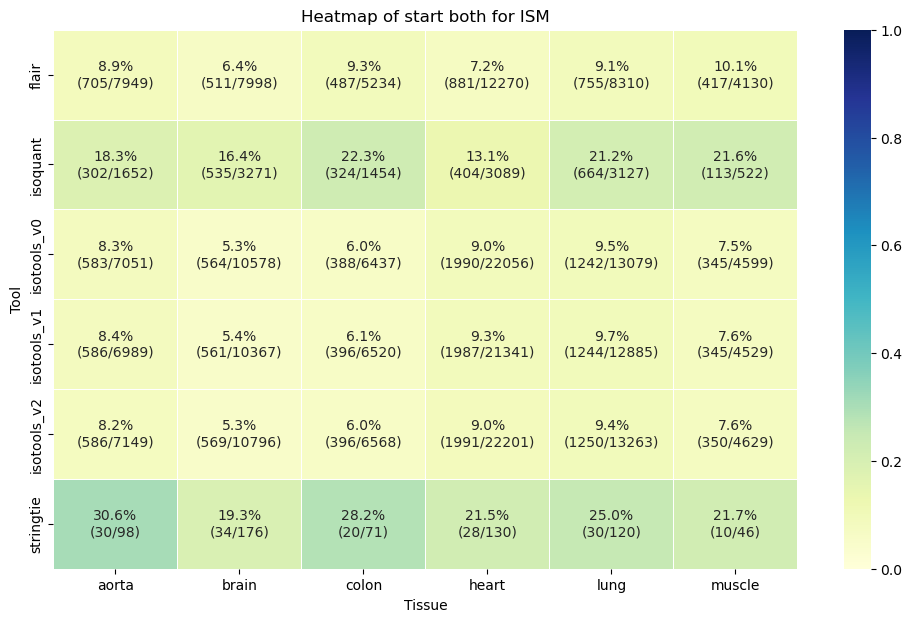

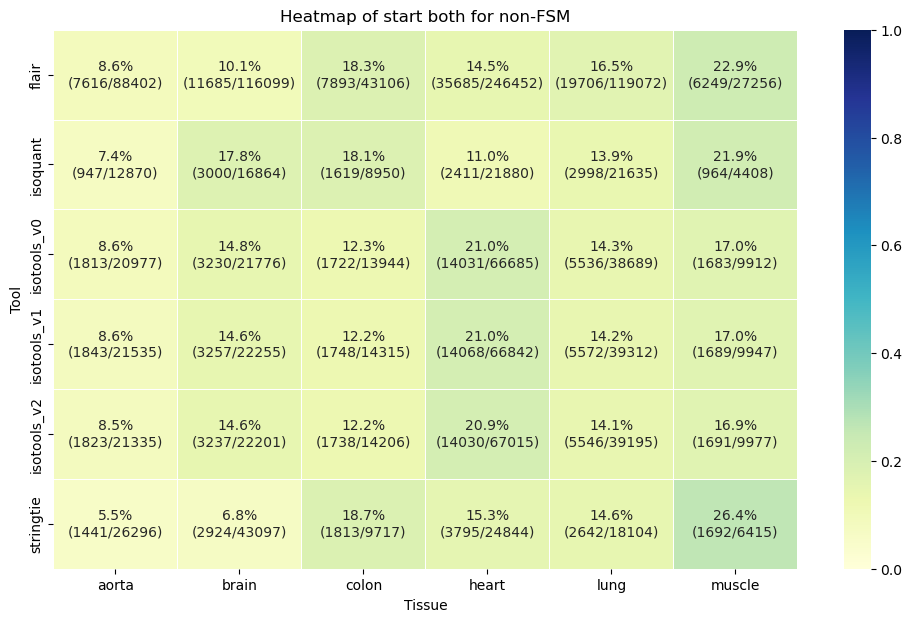

In [17]:
heatmap(agg_by_category.loc[agg_by_category['category'] == 'full-splice_match'], 'start both', ' for FSM', cmap='YlGnBu')
heatmap(agg_by_category.loc[agg_by_category['category'] == 'incomplete-splice_match'], 'start both', ' for ISM', cmap='YlGnBu')
heatmap(non_fsm_df, 'start both', ' for non-FSM', cmap='YlGnBu')

## Ends

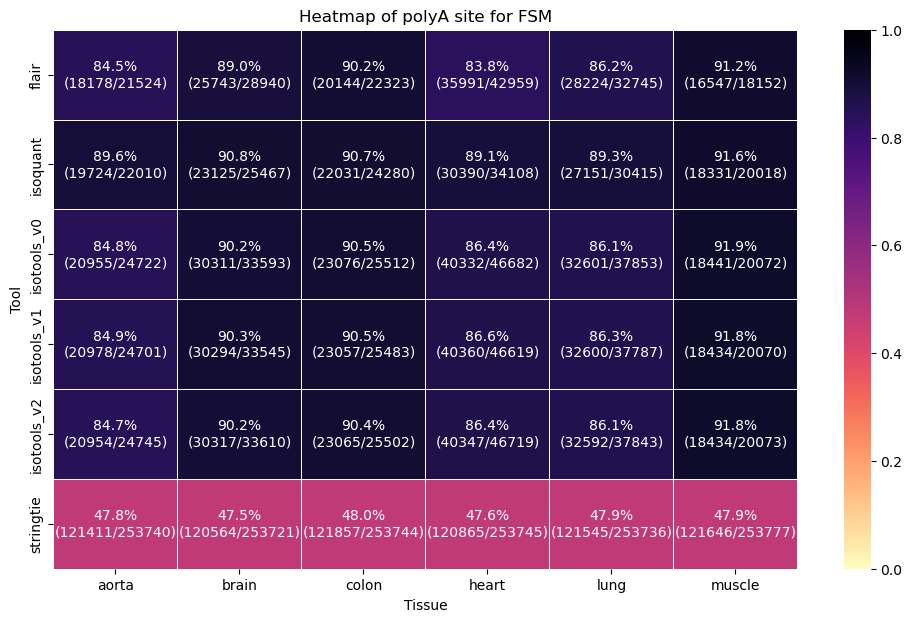

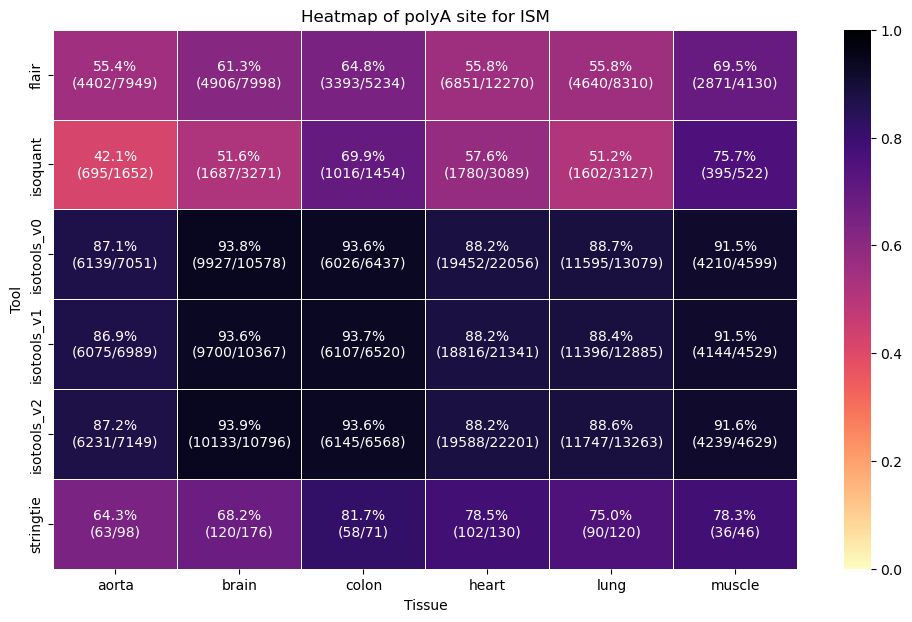

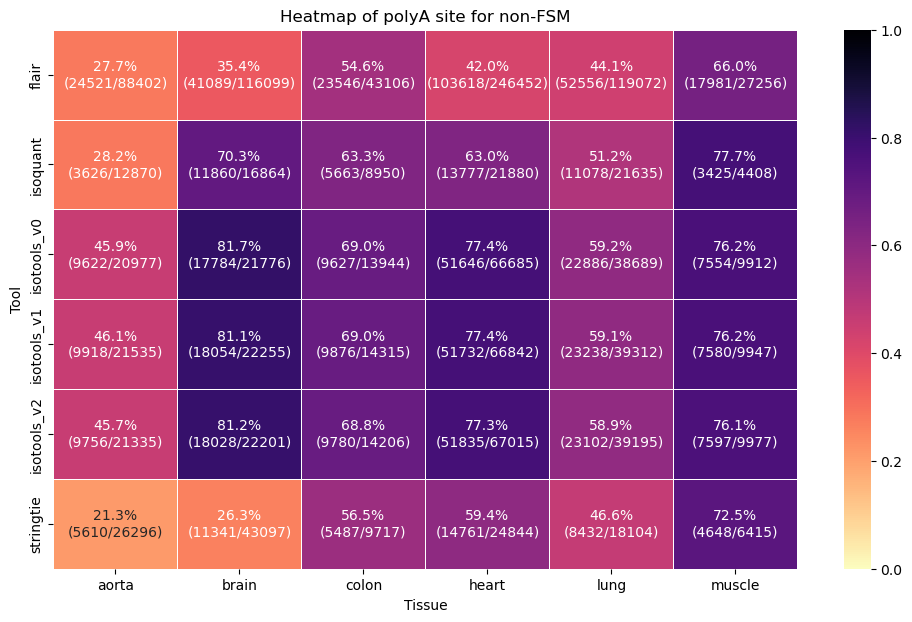

In [18]:
heatmap(agg_by_category.loc[agg_by_category['category'] == 'full-splice_match'], 'polyA site', ' for FSM', cmap='magma_r')
heatmap(agg_by_category.loc[agg_by_category['category'] == 'incomplete-splice_match'], 'polyA site', ' for ISM', cmap='magma_r')
heatmap(non_fsm_df, 'polyA site', ' for non-FSM', cmap='magma_r')

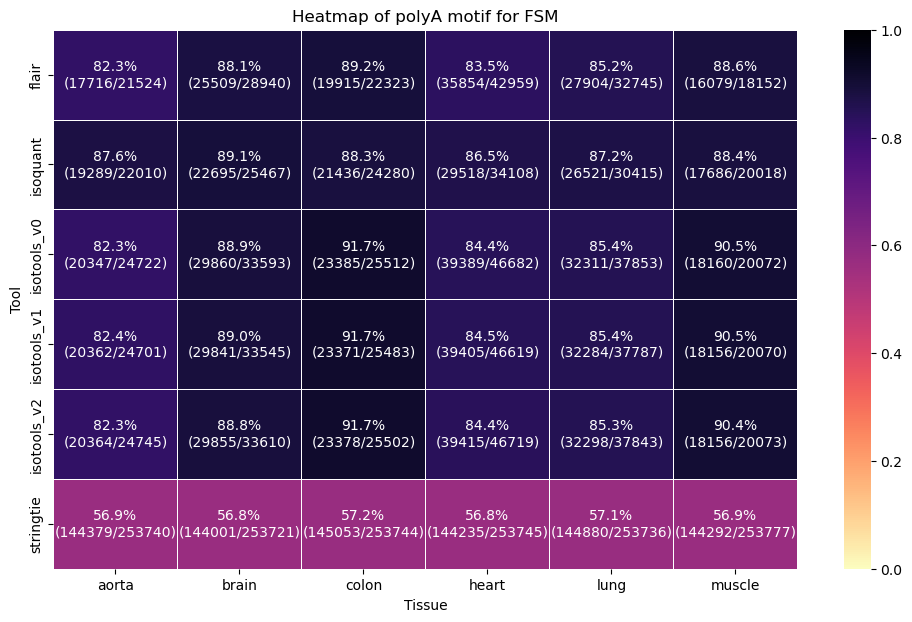

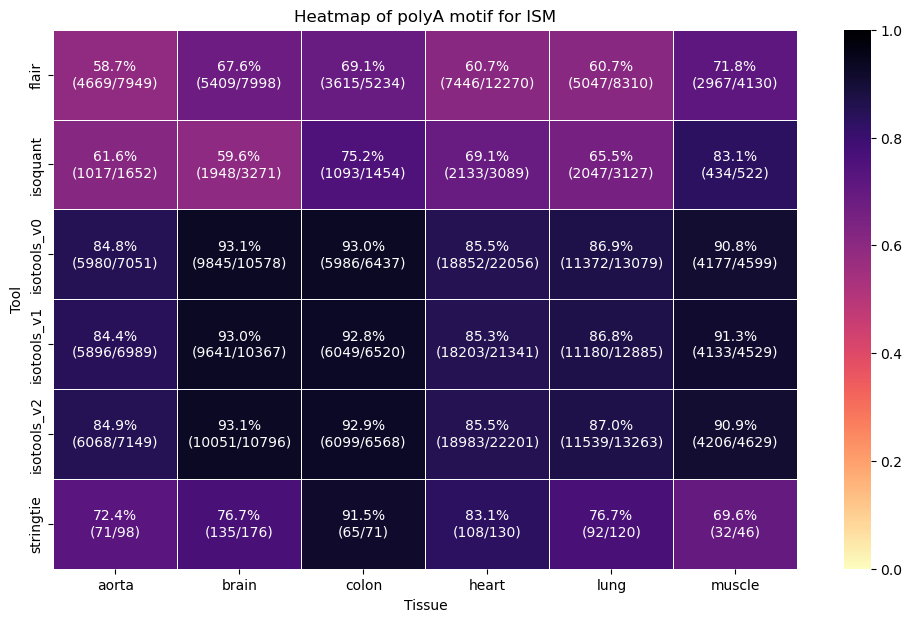

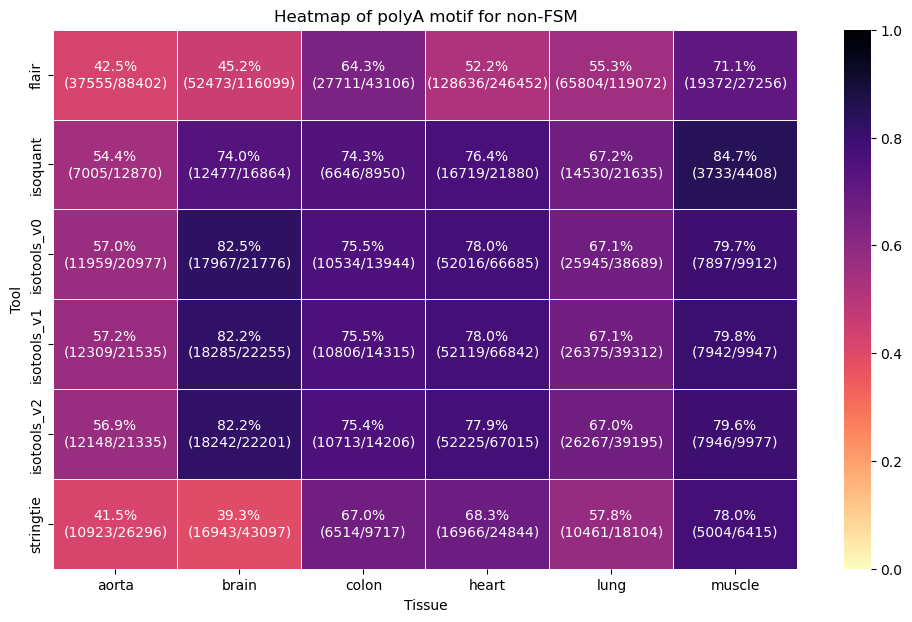

In [19]:
heatmap(agg_by_category.loc[agg_by_category['category'] == 'full-splice_match'], 'polyA motif', ' for FSM', cmap='magma_r')
heatmap(agg_by_category.loc[agg_by_category['category'] == 'incomplete-splice_match'], 'polyA motif', ' for ISM', cmap='magma_r')
heatmap(non_fsm_df, 'polyA motif', ' for non-FSM', cmap='magma_r')

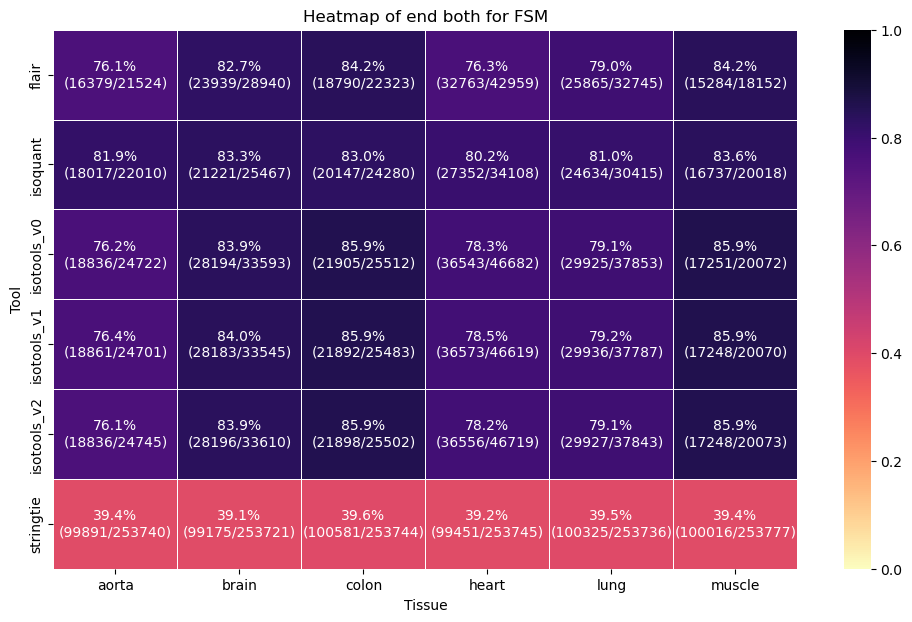

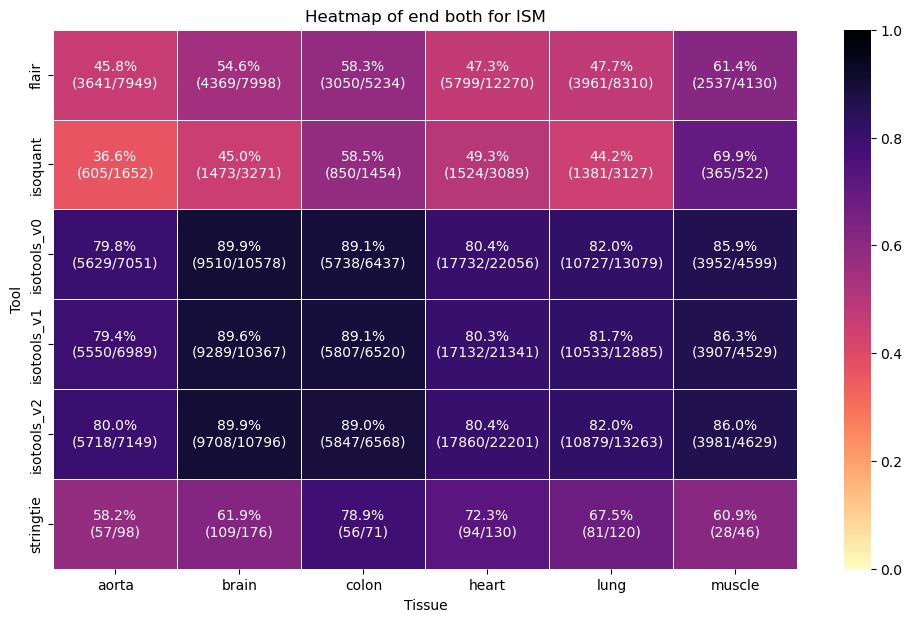

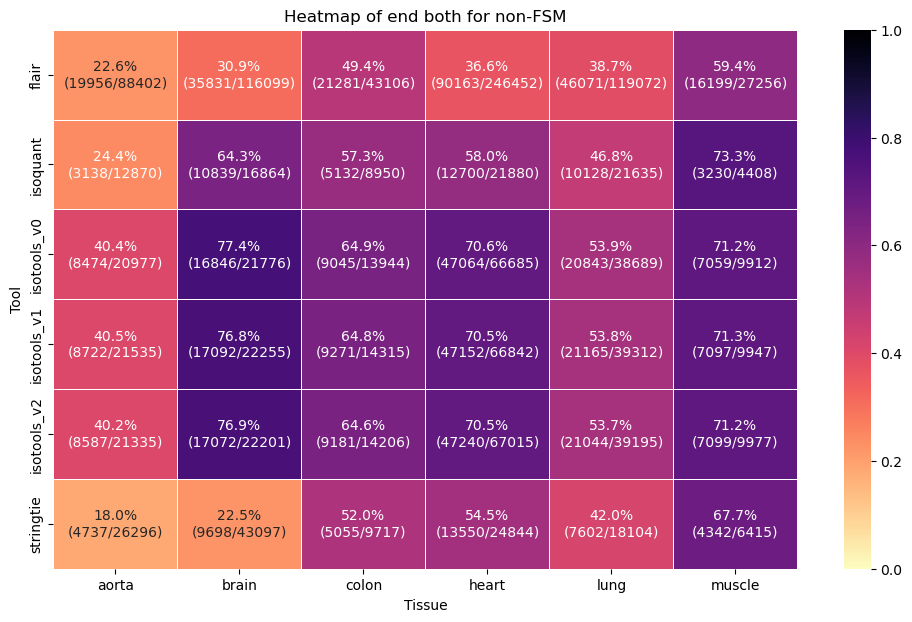

In [20]:
heatmap(agg_by_category.loc[agg_by_category['category'] == 'full-splice_match'], 'end both', ' for FSM', cmap='magma_r')
heatmap(agg_by_category.loc[agg_by_category['category'] == 'incomplete-splice_match'], 'end both', ' for ISM', cmap='magma_r')
heatmap(non_fsm_df, 'end both', ' for non-FSM', cmap='magma_r')

# Subcategory

## Only Monoexons

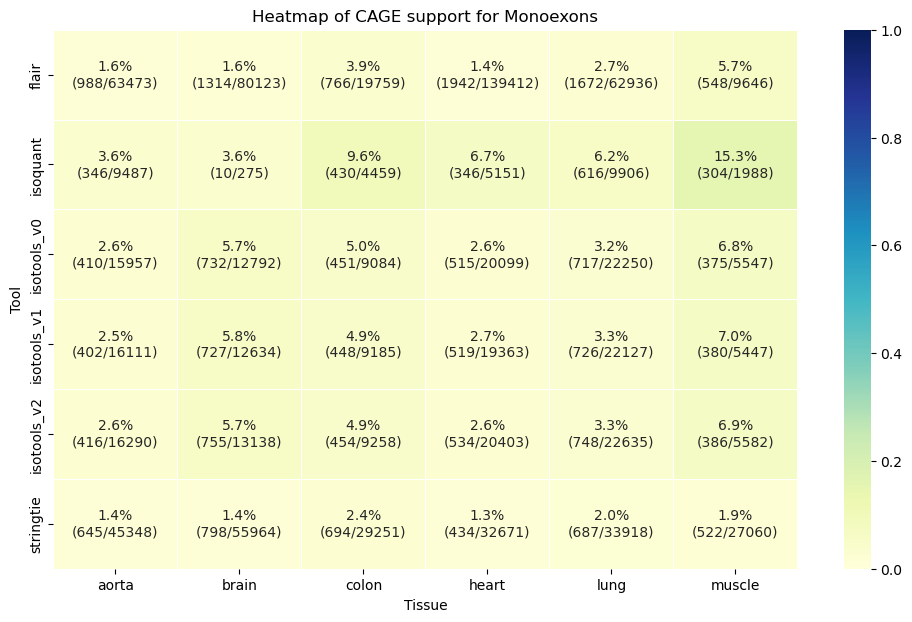

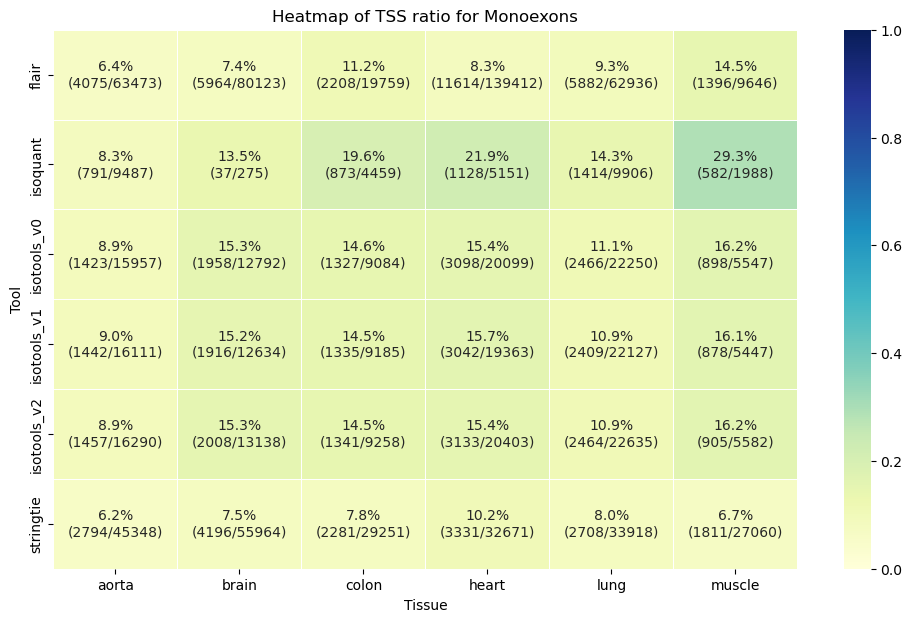

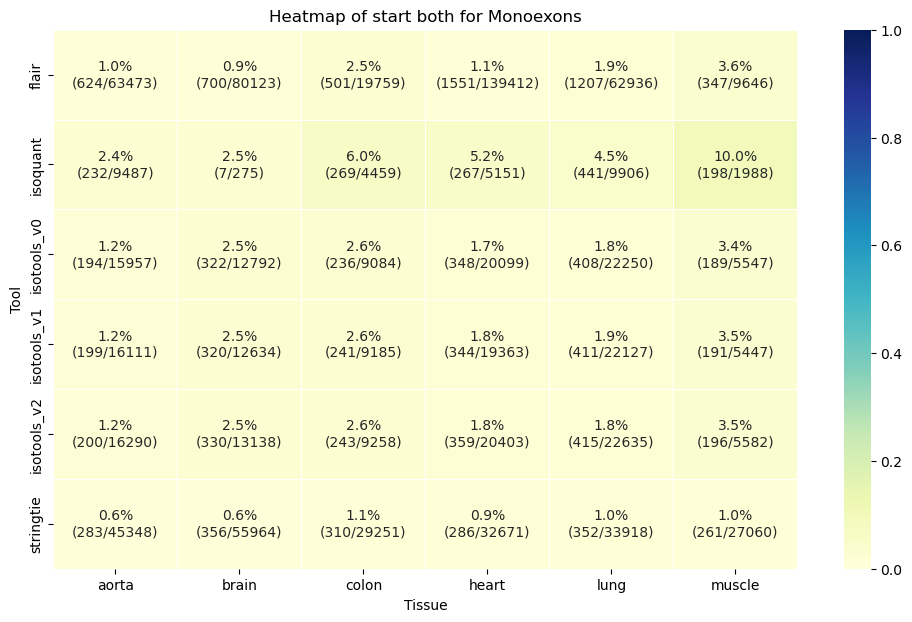

In [21]:
mono_exons = agg_by_subcategory.loc[agg_by_subcategory['subcategory'] == 'mono-exon'].groupby(['tissue', 'tool']).sum().reset_index()
heatmap(mono_exons, 'CAGE support', ' for Monoexons', cmap='YlGnBu')
heatmap(mono_exons, 'TSS ratio', ' for Monoexons', cmap='YlGnBu')
heatmap(mono_exons, 'start both', ' for Monoexons', cmap='YlGnBu')

## ISM w/o Monoexons

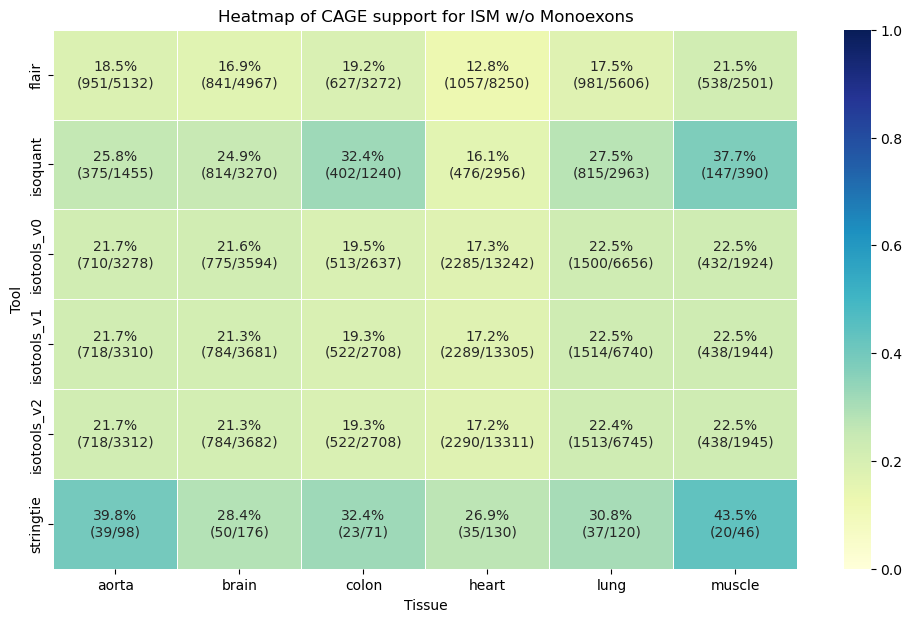

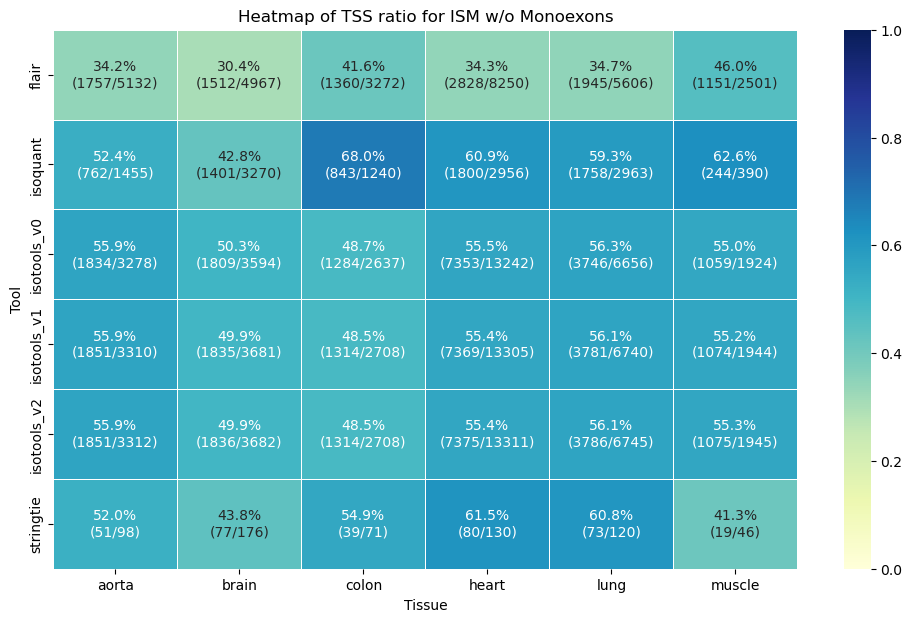

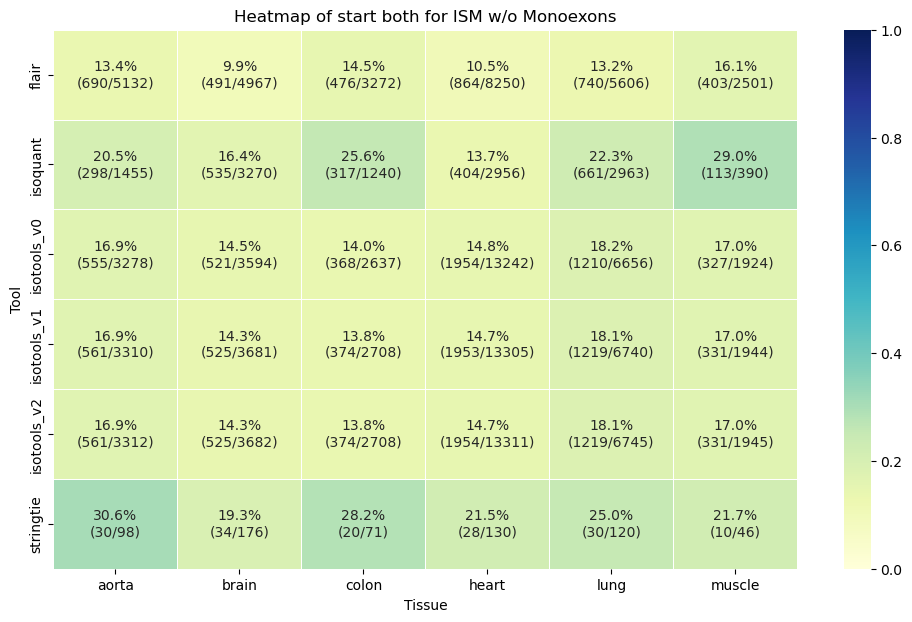

In [23]:
no_mono_ISM = agg_by_subcategory.loc[(agg_by_subcategory['subcategory'] != 'mono-exon') & (agg_by_subcategory['category'] == 'incomplete-splice_match')].groupby(['tissue', 'tool']).sum().reset_index()
heatmap(no_mono_ISM, 'CAGE support', ' for ISM w/o Monoexons', cmap='YlGnBu')
heatmap(no_mono_ISM, 'TSS ratio', ' for ISM w/o Monoexons', cmap='YlGnBu')
heatmap(no_mono_ISM, 'start both', ' for ISM w/o Monoexons', cmap='YlGnBu')